<a href="https://colab.research.google.com/github/joohoshin/TensorflowAI/blob/main/21_2_Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

주가데이터를 표준화해서 학습해봅시다


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
import pandas_datareader.data as web

df = web.DataReader('005930', 'naver', start='2010-01-01', end='2020-12-31')

In [ ]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,16060,16180,16000,16180,239271
2010-01-05,16520,16580,16300,16440,559219
2010-01-06,16580,16820,16520,16820,459755
2010-01-07,16820,16820,16260,16260,443237
2010-01-08,16400,16420,16120,16420,295798
...,...,...,...,...,...
2020-12-23,72400,74000,72300,73900,19411326
2020-12-24,74100,78800,74000,77800,32502870
2020-12-28,79000,80100,78200,78700,40085044


In [ ]:
df.dtypes

Open      object
High      object
Low       object
Close     object
Volume    object
dtype: object

In [ ]:
import pandas as pd
df=df.apply(pd.to_numeric)

In [ ]:
df.dtypes

Open      int64
High      int64
Low       int64
Close     int64
Volume    int64
dtype: object

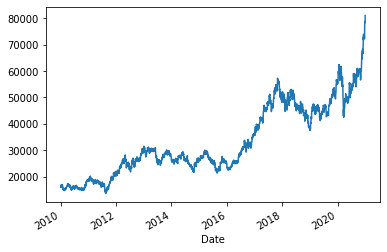

In [ ]:
df.Close.plot()

In [ ]:
TEST_SIZE = 300

train = df.Close[:-TEST_SIZE]
test = df.Close[-TEST_SIZE:]

In [ ]:
import numpy as np
window_size = 20
pred_size = 5

inputs = []
targets = []
for i in range(len(train) - window_size-pred_size):
    inputs.append(np.array(train[i:i+window_size])/train[i])  #시작점의 값으로 나누어 모든 학습데이터가 1에서 시작하도록 변경
    targets.append(np.array(train[i+window_size:i+window_size+pred_size])/train[i+window_size-1]) #시작점의 전값으로 나누어 모든 학습데이터가 1에서 시작하도록 변경


In [ ]:
inputs[1]

array([[1.        ],
       [1.02311436],
       [0.98905109],
       [0.99878345],
       [0.96958637],
       [0.98418491],
       [0.96958637],
       [1.00608273],
       [1.0243309 ],
       [1.02554745],
       [1.00121655],
       [1.01459854],
       [1.03406326],
       [1.00364964],
       [1.0243309 ],
       [0.99148418],
       [0.97323601],
       [0.98296837],
       [0.95377129],
       [0.94525547]])

In [ ]:
targets[0]

array([0.99107143, 0.98469388, 0.99107143, 0.98979592, 0.95663265])

In [ ]:
df.head(30)

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,16060,16180,16000,16180,239271
2010-01-05,16520,16580,16300,16440,559219
2010-01-06,16580,16820,16520,16820,459755
2010-01-07,16820,16820,16260,16260,443237
2010-01-08,16400,16420,16120,16420,295798
2010-01-11,16420,16460,15940,15940,398901
2010-01-12,15940,16180,15900,16180,384460
2010-01-13,16100,16119,15940,15940,267619
2010-01-14,16120,16620,16000,16540,532705


In [ ]:
inputs = np.array(inputs)
targets = np.array(targets)

In [ ]:
print(inputs.shape)
print(targets.shape)

(2389, 20)
(2389, 5)


In [ ]:
window_size = 20
pred_size = 5

test_inputs = []
test_targets = []
for i in range(len(test) - window_size - pred_size):
    test_inputs.append(np.array(test[i:i+window_size])/test[i])
    test_targets.append(np.array(test[i+window_size:i+window_size+pred_size])/test[i+window_size-1])
test_inputs=np.array(test_inputs)
test_targets = np.array(test_targets)

In [ ]:
test_inputs = np.expand_dims(test_inputs,2)

In [ ]:
test_inputs.shape

(275, 20, 1)

In [ ]:

test_targets.shape

(275, 5)

In [ ]:
inputs = np.expand_dims(inputs,2)
targets = np.expand_dims(targets,2)
test_targets = np.expand_dims(test_targets,2)

In [ ]:
test_targets.shape

(275, 5, 1)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = tf.keras.Sequential()
model.add(layers.SimpleRNN(20, 
                           input_shape=(20,1),
                           activation='relu', 
                           return_sequences=False)
          )

model.add(layers.Dense(5))
model.add(layers.Reshape([5,1]))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 20)                440       
_________________________________________________________________
dense (Dense)                (None, 5)                 105       
_________________________________________________________________
reshape (Reshape)            (None, 5, 1)              0         
Total params: 545
Trainable params: 545
Non-trainable params: 0
_________________________________________________________________


In [ ]:

model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(inputs, targets, 
                                    epochs=50, 
                                    batch_size=32,
                                    validation_data=(test_inputs, test_targets))

Epoch 1/50
75/75 [==============================] - 2s 12ms/step - loss: 1.0083 - val_loss: 0.2874
Epoch 2/50
75/75 [==============================] - 0s 4ms/step - loss: 0.1511 - val_loss: 0.0046
Epoch 3/50
75/75 [==============================] - 0s 5ms/step - loss: 0.0029 - val_loss: 0.0042
Epoch 4/50
75/75 [==============================] - 0s 4ms/step - loss: 0.0027 - val_loss: 0.0039
Epoch 5/50
75/75 [==============================] - 0s 4ms/step - loss: 0.0024 - val_loss: 0.0036
Epoch 6/50
75/75 [==============================] - 0s 5ms/step - loss: 0.0024 - val_loss: 0.0033
Epoch 7/50
75/75 [==============================] - 0s 4ms/step - loss: 0.0022 - val_loss: 0.0029
Epoch 8/50
75/75 [==============================] - 0s 4ms/step - loss: 0.0019 - val_loss: 0.0025
Epoch 9/50
75/75 [==============================] - 0s 4ms/step - loss: 0.0016 - val_loss: 0.0024
Epoch 10/50
75/75 [==============================] - 0s 4ms/step - loss: 0.0016 - val_loss: 0.0020
Epoch 11/50
75/75 

In [ ]:
pred = model.predict(test_inputs)

In [ ]:
pred.shape

(275, 5, 1)

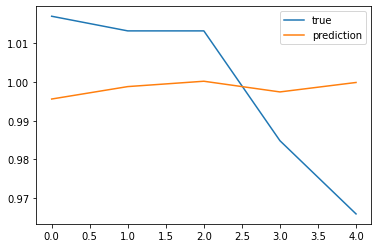

In [ ]:
import matplotlib.pyplot as plt

plt.plot(test_targets[1,:,0], label = 'true')
plt.plot(pred[1,:,0], label = 'prediction')
plt.legend()

In [ ]:
test_inputs.shape

(275, 20, 1)

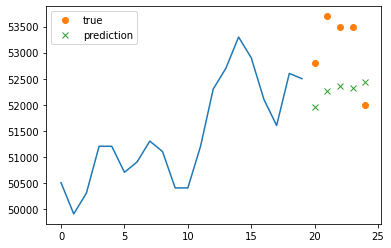

In [ ]:
import matplotlib.pyplot as plt
plt.plot(test_inputs[0,:,0]*test[0])
plt.plot(range(20,25),test_targets[0,:,0]*test[19], label = 'true', marker='o',linestyle='None')
plt.plot(range(20,25),pred[0,:,0]*test[19], label = 'prediction', marker='x',linestyle='None')
plt.legend()